In [1]:
%matplotlib inline

from linUCB_ver3 import LinUCB
import numpy as np
import matplotlib.pyplot as plt

ucb = LinUCB(alpha=0.1, max_items=100, allow_selecting_known_arms=True)

ucb.remove_random_ratings(20)


Initializing matrix A of shape (321, 30, 30) which will require 2.3112MB of memory.

LinUCB successfully initialized.


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
ucb.A.shape

(321, 30, 30)

In [3]:
# recommending page to query (30 queries)
avg_reward, auc_scores  = ucb.run(num_epochs=1)

/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/syu/anaconda3/envs/tf_gpu_cuda10/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_s

Finished epoch 0/1 with avg reward 0.0, auc score 0.5 in 49.471415281295776s


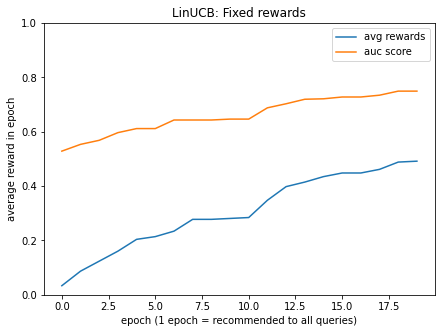

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward, label='avg rewards')
plt.plot(range(len(avg_reward)), auc_scores, label='auc score')
plt.ylabel('average reward in epoch')
plt.ylim(0, 1)
plt.xlabel('epoch (1 epoch = recommended to all queries)')
plt.title('LinUCB: Fixed rewards')
plt.legend()

In [12]:
ucb.dataset.get_uknown_items_of_user(1)

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98])

In [13]:
ucb.A

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  2.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0., -1.,  0., ...,  2.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       ...,

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.

In [4]:
dataarray

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  1.,  0.,  0.],
       [ 2.,  1.,  1., ...,  1.,  0.,  0.],
       ...,
       [97.,  1.,  1., ...,  1.,  0.,  0.],
       [98.,  0.,  1., ...,  0.,  0.,  0.],
       [99.,  1.,  1., ...,  1.,  0.,  0.]])

In [17]:
import pickle
from sklearn.decomposition import PCA

url_features = pickle.load(open('data/infowave_25_1stintent_title.pkl','rb'))
all_features = np.concatenate([v for k,v in url_features.items()], 0)
pca = PCA(n_components=5)
pca.fit_transform(all_features)
print(pca.components_[:,0])

[-0.04802414 -0.01838442  0.01458927 -0.00367106 -0.02371749]


In [14]:
np.concatenate([v for k,v in url_features.items()], 0).shape


(25, 768)

In [8]:
url_features.values().shape

AttributeError: 'dict_values' object has no attribute 'shape'

In [4]:
import pickle


In [11]:
a = question_features['3 Rollovers, 1 was Roth but went into a pretax account. How to fix?']
a.shape

(1, 768)

In [4]:
dict_q_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 57: 56,
 62: 57,
 65: 58,
 68: 59,
 71: 60,
 72: 61,
 78: 62,
 79: 63,
 126: 64,
 129: 65,
 132: 66,
 135: 67,
 137: 68,
 142: 69,
 143: 70,
 145: 71,
 150: 72,
 152: 73,
 153: 74,
 159: 75,
 160: 76,
 162: 77,
 190: 78,
 192: 79,
 197: 80,
 328: 81,
 408: 82,
 409: 83,
 410: 84,
 412: 85,
 413: 86,
 414: 87,
 417: 88,
 418: 89,
 420: 90,
 422: 91,
 423: 92,
 426: 93,
 427: 94,
 428: 95,
 435: 96,
 437: 97,
 440: 98,
 441: 99,
 443: 100,
 541: 101,
 549: 102,
 551: 103,
 552: 104,
 553: 105,
 554: 106,
 560: 1